<a href="https://colab.research.google.com/github/PetrBonyuk/data_analysis/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**

Построить уравнение множественной регрессии, объясняющее потери при реакции.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# Данные (из задания)
data = {
    'день': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'v_воздух': [80, 80, 75, 62, 62, 62, 62, 62, 58, 58, 58, 58, 58, 58, 50, 50, 50, 50, 50, 56, 70],
    't_воды': [27, 27, 25, 24, 22, 23, 24, 24, 23, 18, 18, 17, 18, 19, 18, 18, 19, 19, 20, 20, 20],
    'c_кислота': [89, 88, 90, 87, 87, 87, 93, 93, 87, 80, 89, 88, 82, 93, 89, 86, 72, 79, 80, 82, 91],
    'потери': [42, 37, 37, 28, 18, 18, 19, 20, 15, 14, 14, 13, 11, 12, 8, 7, 8, 9, 1, 15, 15]
}
df = pd.DataFrame(data)
df.drop('день', axis=1, inplace=True)
df.head()

,v_воздух,t_воды,c_кислота,потери
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


**Метод решения**

Для начала исследуем парную корелляцию переменных.

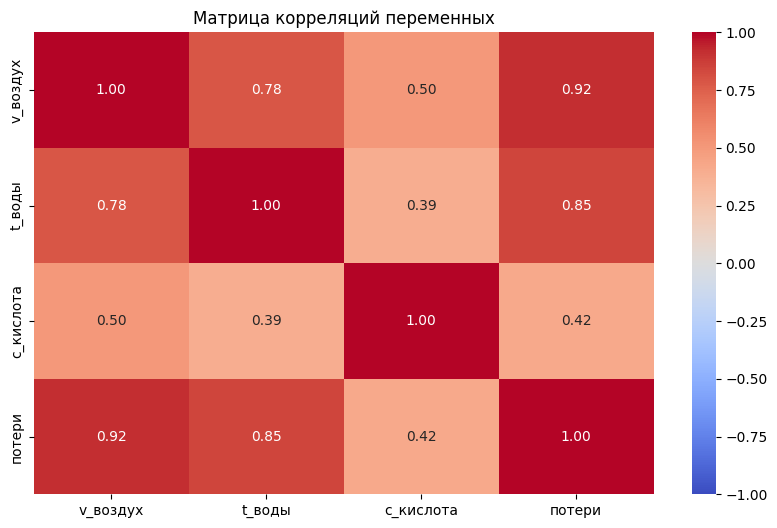

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Матрица корреляций переменных")
plt.show()

**Сильно коррелированные признаки:**


* v_воздух и потери: 0,92

Это сильная положительная корреляция. С увеличением скорости воздуха (v_воздух) потери аммиака (потери) также увеличиваются.

* t_воды и потери: 0,85

Сильная положительная корреляция. Она указывает на то, что с увеличением температуры охлаждающей воды (t_воды) потери аммиака (потери) также увеличиваются.

*  v_воздух и t_воды: 0,78

Сильная положительная корреляция. Она указывает на то, что скорость воздуха (v_воздух) и температура воды (t_воды) взаимосвязаны.

* c_кислота и потери 0,42

Слабая положительная корреляция. Она указывает на то, что с увеличением концентрации азотной кислоты (c_кислота) потери аммиака (потери) немного увеличиваются, но влияние незначительно.

* c_кислота и v_воздух 0,50

Умеренная положительная корреляция. Она указывает на то, что скорость воздуха (v_воздух) и концентрация азотной кислоты (c_кислота) взаимосвязаны, но не сильно.

* c_кислота и t_воды 0,39

Это слабая положительная корреляция. Она указывает на то, что температура воды (t_воды) и концентрация азотной кислоты (c_кислота) взаимосвязаны, но незначительно.


In [ ]:

#Объясняющие признаки
X = df[["v_воздух", "t_воды", "c_кислота"]]
#Объясняемые признаки
Y = df["потери"]

# Добавляем единичный столбец в X для свободного члена (b0)
X = np.hstack((np.ones((X.shape[0], 1)), X))


**Расчет коэффициентов**

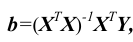

In [ ]:
#   b = (X^T X)^(-1) X^T Y
XtX_inv = np.linalg.inv(X.T @ X)  # (X^T X)^(-1)
XtY = X.T @ Y                    # X^T Y
b = XtX_inv @ XtY                # b = (X^T X)^(-1) X^T Y

print("Коэффициенты регрессии (b):\n", b)


Коэффициенты регрессии (b):
 [-45.52262211   0.78950893   1.12779735  -0.10183553]


**Проверка модели**

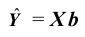

In [ ]:
# Оценочные значения Y
Y_hat = X @ b
print("Оценочные значения Y:", Y_hat)

Оценочные значения Y: [39.02525784 39.12709338 32.72028297 21.63437618 19.37878149 20.50657883
 21.02336297 21.02336297 17.34854313 12.42240513 11.50588531 10.4799235
 12.21873406 12.22634052  5.1898139   5.4953205   8.04881534  7.3359666
  8.36192841 12.8953109  23.03191606]


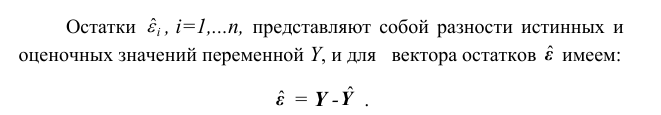

In [ ]:
# Остатки
residuals = Y - Y_hat
print("\nОстатки (residuals):\n", residuals)

# Сумма квадратов остатков
S = np.sum(residuals**2)
print("\nСумма квадратов остатков (S):", S)


Остатки (residuals):
 0     2.974742
1    -2.127093
2     4.279717
3     6.365624
4    -1.378781
5    -2.506579
6    -2.023363
7    -1.023363
8    -2.348543
9     1.577595
10    2.494115
11    2.520077
12   -1.218734
13   -0.226341
14    2.810186
15    1.504679
16   -0.048815
17    1.664033
18   -7.361928
19    2.104689
20   -8.031916
Name: потери, dtype: float64

Сумма квадратов остатков (S): 243.72038181725708


In [ ]:


print(f"\nУравнение регрессии: Потери = {b[0]:.2f} + {b[1]:.2f} * v_воздух + {b[2]:.2f} * t_воды + {b[3]:.2f} * c_кислота")


Уравнение регрессии: Потери = -45.52 + 0.79 * v_воздух + 1.13 * t_воды + -0.10 * c_кислота
